# CSC413 Lab 3: Multi-Layer Perceptrons with MedMNIST

MedMNIST's PneumoniaMNIST data set. We will now transition fully to
using PyTorch for our labs going forward.

By the end of this lab, you will be able to:

1. Build and train an MLP using PyTorch
2. Define the following performance metrics for evaluating machine learning models: true positive, true negative, false positive, false negative, precision, recall, ROC curve, and AUC.
3. Interpret the confusion matrix.
4. Explain the advantages of the AUC metrics over accuracy metrics.
5. Perform grid search to find hyperparameters.

Acknowledgements:

- The MedMNIST data is from https://medmnist.com/
- This assignment is written by Mahdi Haghifam, Sonya Allin, Lisa Zhang, Mike Pawliuk and Rutwa Engineer

Please work in groups of 1-2 during the lab.

## Submission

If you are working with a partner, start by creating a group on Markus. If you are working alone,
click "Working Alone".

Submit the ipynb file `lab03.ipynb` on Markus
**containing all your solutions to the Graded Task**s.
Your notebook file must contain your code **and outputs** where applicable,
including printed lines and images.
Your TA will not run your code for the purpose of grading.

For this lab, you should submit the following:

- Part 2. Your expression that computes the number of trainable parameters in the MLPModel (1 point)
- Part 2. Your implementation of `accuracy`. (1 point)
- Part 2. Your implementation of `train_model`. (2 points)
- Part 3. Your implementation of `precision` and `recall`. (2 points)
- Part 3. Your interpretation of the confusion matrix for `m_once` (1 point)
- Part 4. Your completion of the grid search, along with the output (2 point)
- Part 4. Your description of why a model with high AUC may still perform poorly for some groups (1 point)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Google Colab Setup

We will be using the `medmnist` data set, which is available as a Python package.
Recall that on Google Colab, we use "!" to run shell commands.

In [ ]:
!pip install medmnist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=5bdd0847666c18c2a389988ee448f5c24fdda79b0262b195040ce6276f5de8f1
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


## Part 1. Data

We will use the MedMNIST data set, which is described here: [https://medmnist.com/](https://medmnist.com/).
We will use the PneumoniaMNIST images, which are greyscale chest X-ray images that has been resized to 28x28.
The task is to predict, given one of these X-ray images, whether the patient has pneumonia or not---a binary
classification task.
We chose this dataset both because it is lightweight, and because it allows us to discuss the sensitive nature of
biomedical images.

Let's begin by printing some information about the PneumoniaMNIST  data set:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import medmnist
from medmnist import PneumoniaMNIST

medmnist.INFO['pneumoniamnist']

{'python_class': 'PneumoniaMNIST',
 'description': 'The PneumoniaMNIST is based on a prior dataset of 5,856 pediatric chest X-Ray images. The task is binary-class classification of pneumonia against normal. We split the source training set with a ratio of 9:1 into training and validation set and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384−2,916)×(127−2,713). We center-crop the images and resize them into 1×28×28.',
 'url': 'https://zenodo.org/records/10519652/files/pneumoniamnist.npz?download=1',
 'MD5': '28209eda62fecd6e6a2d98b1501bb15f',
 'url_64': 'https://zenodo.org/records/10519652/files/pneumoniamnist_64.npz?download=1',
 'MD5_64': '8f4eceb4ccffa70c672198ea285246c6',
 'url_128': 'https://zenodo.org/records/10519652/files/pneumoniamnist_128.npz?download=1',
 'MD5_128': '05b46931834c231683c68f40c47b2971',
 'url_224': 'https://zenodo.org/records/10519652/files/pneumoniamnist_224.npz?download=1',
 'MD5_224': 'd6a3c71de1b94

**Task**: The dataset providers already split the data into training, validation, and test sets.
How many samples are there in the training, validation, and test sets?

In [ ]:
# TODO: Write your answer here.
"""
4708 training
524 validation
624 test
"""

'\n4708 training\n524 validation\n624 test\n'

Let's visually inspect the first element of the training data:

In [1]:
train_data_imgs = PneumoniaMNIST(split='train', download=True)

for img, target in train_data_imgs:
    plt.imshow(img, cmap='gray')
    print(np.array(img)) # img is a numpy array of shape 28x28 , with integer values between 0-255
    print(target)        # the target
    break

NameError: name 'PneumoniaMNIST' is not defined

**Task**: Based on the code above, what is the type of the data structure `train_data`?

In [ ]:
# TODO: Write your answer here.
"""
tuple or list.
The first element is the matrix representation of an image
The second element is the target of this image
"""

'\ntuple or list.\nThe first element is the matrix representation of an image\nThe second element is the target of this image\n'

**Task**: The code below plots 5 images from each class: normal and pneumonia.
Do you notice qualitative differences between these two sets of images?
It is always important to qualitatively assess your data prior to training, so that you
can develop intuition as to what features may or may not be important for your model.
Understanding your data also helps to estimate how challenging the classification problem
may be and identify incorrect implementations (e.g., a surprisingly high model accuracy could
indicate issues with training set leakage into the test set).

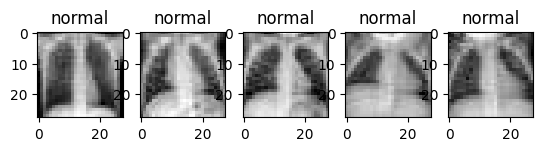

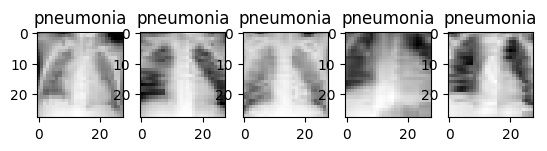

In [ ]:
# normal images
plt.figure()
n = 0
for img, target in train_data_imgs:
    if int(target) == 0:
      plt.subplot(1, 5, n+1)
      plt.title("normal")
      plt.imshow(img, cmap='gray')
      n += 1
    if n >= 5:
      break
# pneumonia images
plt.figure()
n = 0
for img, target in train_data_imgs:
    if int(target) == 1:
      plt.subplot(1, 5, n+1)
      plt.title("pneumonia")
      plt.imshow(img, cmap='gray')
      n += 1
    if n >= 5:
      break

In [ ]:
# TODO: Write your explanation here.
"""
The image of lungs with pneumonia is whiter in general.
"""

'\nThe image of lungs with pneumonia is whiter in general.\n'

PyTorch makes it easy to apply pre-processing transformations to the data, for example to normalize
the data prior to using for training. We will use the standard preprocessing functions to
*transform the images into tensors* for PyTorch to be able to use. This transformation also
changes the values to be floating-point numbers between 0 and 1.

In [ ]:
import torchvision.transforms as transforms # contains a collection of transformations

train_data = PneumoniaMNIST(split='train', download=True, transform=transforms.ToTensor())
val_data = PneumoniaMNIST(split='val', download=True, transform=transforms.ToTensor())
test_data = PneumoniaMNIST(split='test', download=True, transform=transforms.ToTensor())

cnt_test_pneumonia = 0
for img, target in train_data:
    # print(img)    # img is a PyTorch tensor fo shape 1x28x28
    # print(target) # the target
    cnt_test_pneumonia += target[0]

print(cnt_test_pneumonia)

cnt_val_pneumonia = 0
for img, target in val_data:
    # print(img)    # img is a PyTorch tensor fo shape 1x28x28
    # print(target) # the target
    cnt_val_pneumonia += target[0]

print(cnt_val_pneumonia)

Using downloaded and verified file: /root/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /root/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /root/.medmnist/pneumoniamnist.npz
3494
389


**Task**: How many X-ray images are in the training set *with* pneumonia? What about *without* pneumonia?
What about the validation/test sets?
What does your answer say about the data balance?

In [ ]:
# TODO: Write code to find the answer here.
"""
test with pneumonia: 3494
test w/o pneumonia: 1214
val with pneumonia: 389
val w/o pneumonia: 135

The data is not balanced in terms of number of data set with and without pneumonia.
But the ratio across different dataset is approx same.
"""


'\ntest with pneumonia: 3494\ntest w/o pneumonia: 1214\nval with pneumonia: 389\nval w/o pneumonia: 135\n\nThe data is not balanced in terms of number of data set with and without pneumonia.\nBut the ratio across different dataset is approx same.\n'

## Part 2. Model and Training

We will build our own PyTorch model, which will be a subclass of `nn.Module`.
This subclass provides the important methods that we used in the training loop
in lab 1, including the methods that allow us to compute the forward pass
by calling the model object, and other methods used under the hood to compute
the backward pass.

Our model will be a three-layer MLP with the following architecture:
ACTUALTODO---the model architecture may change!

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class MLPModel(nn.Module):
    """A three-layer MLP model for binary classification"""
    def __init__(self, input_dim=28*28, num_hidden=100):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, num_hidden)
        self.fc2 = nn.Linear(num_hidden, num_hidden)
        self.fc3 = nn.Linear(num_hidden, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

**Graded Task**: How many trainable parameters are in this model?
Express your answer in terms of `input_dim` and `num_hidden`.

In [ ]:
# TODO: Compute the number of trainable parameters in MLPModel
"""
input_dim * (num_hidden + 1) + num_hidden * (num_hidden + 1) + nums_hidden * (1 + 1). Counting the bias terms
"""

'\ninput_dim * (num_hidden + 1) + num_hidden * (num_hidden + 1) + nums_hidden * (1 + 1). Counting the bias terms\n'

In order to assess model performance, we will begin by
implementing the `accuracy` function, which computes the accuracy
of the model across a dataset.

**Graded Task**: Complete the `accuracy` function. Keep in mind
that this function will be slightly different from the `accuracy`
function in lab 1, since we are working on a binary classification
problem and prediction here is a single logit value (rather than
a vector).

In [ ]:
from re import L
def accuracy(model, dataset):
    """
    Compute the accuracy of `model` over the `dataset`.
    We will take the **most probable class**
    as the class predicted by the model.

    Parameters:
        `model` - A PyTorch MLPModel
        `dataset` - A data structure that acts like a list of 2-tuples of
                  the form (x, t), where `x` is a PyTorch tensor of shape
                  [1, 28, 28] representing an MedMNIST image,
                  and `t` is the corresponding binary target label

    Returns: a floating-point value between 0 and 1.
    """

    correct, total = 0, 0
    loader = torch.utils.data.DataLoader(dataset, batch_size=100)
    for img, t in loader:
        X = img.reshape(-1, 784)
        z = model(X)
        y = (z > 0).int() # TODO: pred should be a [N, 1] tensor with binary
                    # predictions, (0 or 1 in each entry)

        correct += int(torch.sum(t == y))
        total   += t.shape[0]

    return correct / total

Because we are working with binary classification, we will be using a
different implementation of the cross-entropy loss function, implemented
via PyTorch in a class called `BCEWithLogitsLoss` (short for
Binary Cross Entropy with Logits loss).

In [ ]:
 criterion = nn.BCEWithLogitsLoss()

This loss function takes a predicted logit (pre-softmax activation)
and the ground-truth label.
The use of pre-softmax logits rather than prediction probabilities is
due to numerical stability reasons.

In [ ]:
print(criterion(torch.tensor([2.5]),  # predicted
                torch.tensor([1.])))  # actual

print(criterion(torch.tensor([-2.5]), # predicted
                torch.tensor([1.])))  # actual

tensor(0.0789)
tensor(2.5789)


**Task**: Explain why the second printed
value above is *larger* than the first. In other words,
why does it make sense that we think of the second prediction
(logit of z=-2.5) as "worse" than the first (logit of z=2.5)?

In [ ]:
# TODO: Your explanation goes here.
"""
In the second prediction, these data points are farthur apart compared to the first one.
"""

'\nIn the second prediction, these data points are farthur apart compared to the first one.\n'

**Graded Task**: Complete the following code to be used for training.

50 Loss: 0.4926641881465912 Train Acc: 0.7421410365335599 Val Acc: 0.7423664122137404
100 Loss: 0.8192053437232971 Train Acc: 0.7525488530161427 Val Acc: 0.7557251908396947
150 Loss: 0.35205700993537903 Train Acc: 0.8986830926083262 Val Acc: 0.9064885496183206
200 Loss: 0.31153950095176697 Train Acc: 0.9118521665250637 Val Acc: 0.9236641221374046
250 Loss: 0.2577400505542755 Train Acc: 0.909303313508921 Val Acc: 0.9103053435114504
300 Loss: 0.15712907910346985 Train Acc: 0.9203483432455395 Val Acc: 0.9255725190839694
350 Loss: 0.22494859993457794 Train Acc: 0.8993203058623619 Val Acc: 0.8893129770992366
400 Loss: 0.09202881157398224 Train Acc: 0.9311809685641461 Val Acc: 0.9408396946564885
450 Loss: 0.13956905901432037 Train Acc: 0.9256584536958369 Val Acc: 0.9293893129770993


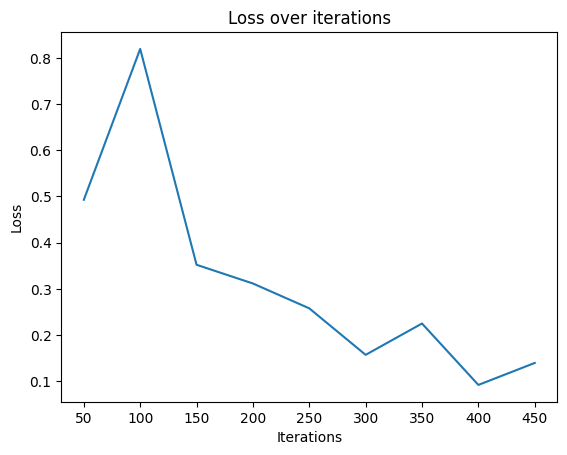

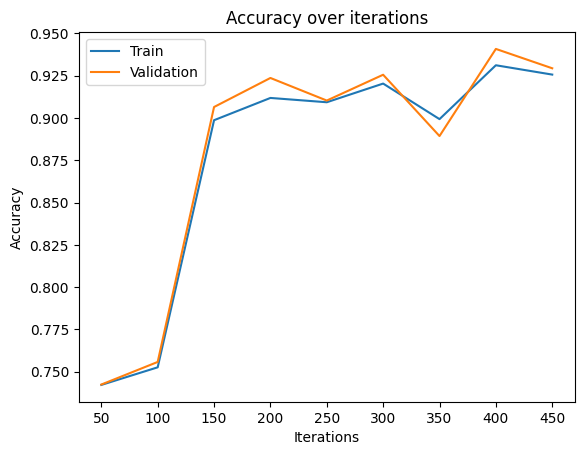

In [ ]:
def train_model(model,                # an instance of MLPModel
                train_data,           # training data
                val_data,             # validation data
                learning_rate=0.1,
                batch_size=100,
                num_epochs=10,
                plot_every=50,        # how often (in # iterations) to track metrics
                plot=True):           # whether to plot the training curve
    train_loader = torch.utils.data.DataLoader(train_data,
                                               batch_size=batch_size,
                                               shuffle=True) # reshuffle minibatches every epoch
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    # these lists will be used to track the training progress
    # and to plot the training curve
    iters, train_loss, train_acc, val_acc = [], [], [], []
    iter_count = 0 # count the number of iterations that has passed

    try:
        for e in range(num_epochs):
            for i, (images, labels) in enumerate(train_loader):
                X = images.reshape(-1, 784) # TODO
                z = model(X)
                loss = criterion(z, labels.float()) # TODO

                loss.backward() # propagate the gradients
                optimizer.step() # update the parameters
                optimizer.zero_grad() # clean up accumualted gradients

                iter_count += 1
                if iter_count % plot_every == 0:
                    iters.append(iter_count)
                    ta = accuracy(model, train_data)
                    va = accuracy(model, val_data)
                    train_loss.append(float(loss))
                    train_acc.append(ta)
                    val_acc.append(va)
                    print(iter_count, "Loss:", float(loss), "Train Acc:", ta, "Val Acc:", va)
    finally:
        # This try/finally block is to display the training curve
        # even if training is interrupted
        if plot:
            plt.figure()
            plt.plot(iters[:len(train_loss)], train_loss)
            plt.title("Loss over iterations")
            plt.xlabel("Iterations")
            plt.ylabel("Loss")

            plt.figure()
            plt.plot(iters[:len(train_acc)], train_acc)
            plt.plot(iters[:len(val_acc)], val_acc)
            plt.title("Accuracy over iterations")
            plt.xlabel("Iterations")
            plt.ylabel("Accuracy")
            plt.legend(["Train", "Validation"])

# Please include the output of this cell for grading
model = MLPModel()
train_model(model, train_data, val_data)

**Task**: Suppose that a model has a validation accuracy of 74% for this
binary classification task. Why would this model be considered a very bad model?
Your answer should illustrate why accuracy may not be an excellent tool to use.

In [ ]:
# TODO: Write your explanation here
"""
Around 74% data are with pneumonia, a simplist model that predict there data is with
pneumonia will achieve this accuracy.
"""

'\nAround 74% data are with pneumonia, a simplist model that predict there data is with\npneumonia will achieve this accuracy.\n'

## Part 3. Performance Metrics

We often use accuracy as a go-to metric when evaluating the performance of
a classification model. However, the accuracy measure weighs all errors equally.
A deeper look into the types of errors made can provide a more complete picture
of model performance, especially when there is data imbalance and---when applying
models in real situations---when some errors may be associated with more serious
impacts to users than others.

To start our explorations, we'll look at the decisions we made well, i.e. the:

- True Positives (TP), or positive outcomes that were correctly predicted as positive.
- True Negatives (TN), or negative outcomes that were correctly predicted as negative.

Then we will look at our mistakes, i.e. the:

- False Positives (FP, or Type I errors), or negative outcomes that were predicted as positive. In our case, this occurs when our model predicts that a person has heart disease, but they do not.
- False Negatives (FN, or Type II errors), or positive outcomes that were predicted as negative. In our case, this occurs when our model predicts that a person does not have heart disease, but they do.

We can then use the metrics above to calculate:

- Precision (or True Positive Rate, or Positive Predicive Value): $\frac{TP}{TP + FP}$. The answers the question: out of all the examples that we predicted as positive, how many are really positive?
- Recall (or Sensitivity): $\frac{TP}{TP + FN}$. The answers the question: out of all the positive examples in the data set, how many did we predict as positive?
- Negative Predicive Value: $\frac{TN}{TN + FN}$. The answers the question: out of all the examples that we predicted as negative, how many are really negative?

Note that there are many metrics with subtly different meanings and interpretations. Make sure to be precise in what you present and why!

**Graded Task**: Complete the functions `precision` and `recall`:

In [ ]:
def precision(model, dataset):
    """
    Compute the precision of `model` over the `dataset`.  We will take the
    **most probable class** as the class predicted by the model.

    Parameters:
        `model` - A PyTorch MLPModel
        `dataset` - A data structure that acts like a list of 2-tuples of
                  the form (x, t), where `x` is a PyTorch tensor of shape
                  [1, 28, 28] representing an MedMNIST image,
                  and `t` is the corresponding binary target label

    Returns: a floating-point value between 0 and 1.
    """
    true_pos, total_pred_pos = 0, 0
    loader = torch.utils.data.DataLoader(dataset, batch_size=100)
    for img, t in loader:
        X = img.reshape(-1, 784)
        z = model(X)

        y = (z > 0).int() # TODO: pred should be a [N, 1] tensor with binary
                    # predictions, (0 or 1 in each entry)

        # TODO: update total_pred_pos and true_pos
        true_pos += torch.sum(t * y)
        total_pred_pos += torch.sum(y)
    return true_pos / total_pred_pos


def recall(model, dataset):
    """
    Compute the recall (or sensitivity) of `model` over the `dataset`.  We will
    take the **most probable class** as the class predicted by the model.

    Parameters:
        `model` - A PyTorch MLPModel
        `dataset` - A data structure that acts like a list of 2-tuples of
                  the form (x, t), where `x` is a PyTorch tensor of shape
                  [1, 28, 28] representing an MedMNIST image,
                  and `t` is the corresponding binary target label

    Returns: a floating-point value between 0 and 1.
    """
    true_pos, total_actual_pos = 0, 0 # track the true and false positive
    loader = torch.utils.data.DataLoader(dataset, batch_size=100)
    for img, t in loader:
        X = img.reshape(-1, 784)
        z = model(X)

        y = (z > 0).int() # TODO: pred should be a [N, 1] tensor with binary
                    # predictions, (0 or 1 in each entry)

        # TODO: update total_pos and true_pos
        true_pos += torch.sum(t * y)
        total_actual_pos += torch.sum(t)
    return true_pos / total_actual_pos

print("Precision(Training)", precision(model, train_data))
print("Recall(Training)", recall(model, train_data))
print("Precision(Validation)", precision(model, val_data))
print("Recall(Validation)", recall(model, val_data))

Precision(Training) tensor(0.9684)
Recall(Training) tensor(0.9376)
Precision(Validation) tensor(0.9733)
Recall(Validation) tensor(0.9383)


A **confusion matrix** is a table that shows the number of TP, TN, FP, and FN.  A confusion matrix can be a valuable tool in understanding
why a model makes the mistake that it makes.

**Task** Run the code below to display the confusion matrix for your model
for the validation data.

Text(0.5, 1.0, 'Confusion Matrix (Val Data)')

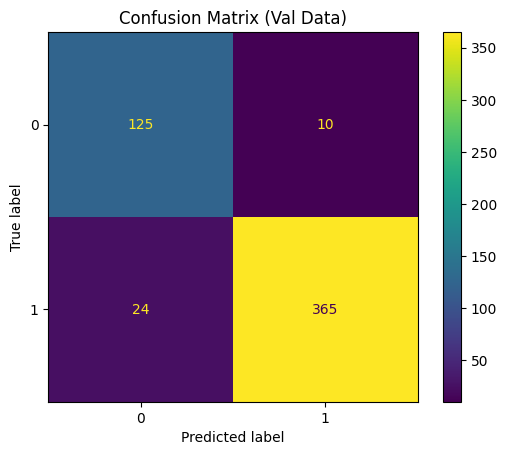

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def get_prediction(model, data, sample=1000):
    loader = torch.utils.data.DataLoader(data, batch_size=sample, shuffle=True)
    for X, t in loader:
        z = model(X.view(-1, 784))
        y = torch.sigmoid(z)
        break
    y = y.detach().numpy()
    t = t.detach().numpy()
    return y, t

y, t = get_prediction(model, val_data)
y = y > 0.5
cm = confusion_matrix(t, y)
cmp = ConfusionMatrixDisplay(cm, display_labels=["0", "1"])
cmp.plot()
plt.title("Confusion Matrix (Val Data)")

**Task**: The code below trains a MLPModel for a very few number
of iterations. You should see that this model achieves a 74% accuracy.
Display the confusion matrix for this model by running the code below.

Training Accuracy: 0.7421410365335599
Validation Accuracy: 0.7423664122137404


Text(0.5, 1.0, 'Confusion Matrix (Val Data)')

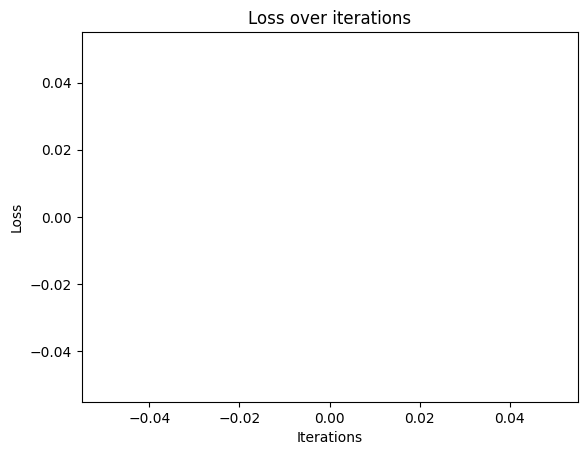

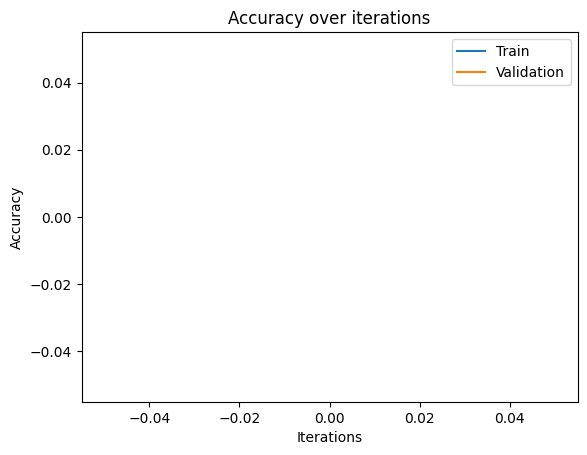

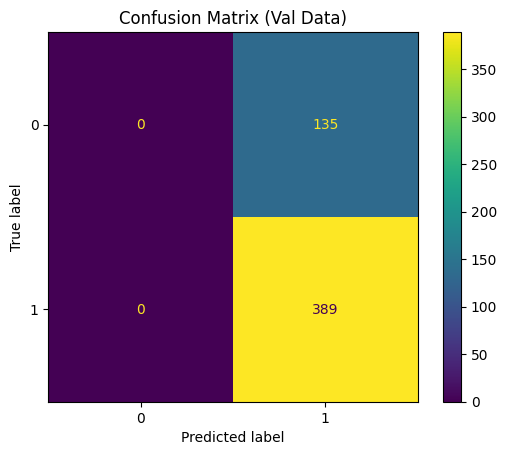

In [ ]:
m_once = MLPModel()
train_model(m_once, train_data, val_data, learning_rate=0.5, batch_size=500, num_epochs=1)
print("Training Accuracy:", accuracy(m_once, train_data))
print("Validation Accuracy:", accuracy(m_once, val_data))

y, t = get_prediction(m_once, val_data)
y = y > 0.5
ConfusionMatrixDisplay(confusion_matrix(t, y), display_labels=["0", "1"]).plot()
plt.title("Confusion Matrix (Val Data)")

**Graded Task**: What does the confusion matrix tell you about how
the `m_once` model is achieving 74% accuracy?

In [ ]:
# TODO: Your explanation goes here.
"""
This is model predicts every data to be positive.
"""

'\nThis is model predicts every data to be positive.\n'

We have been choosing a threshold of 0.5 for turning our continuous predicted
probabilities into a discrete prediction. However, this can be an
arbitrary choice.

**Task**: Note that we looked at the sign of the logits at the beginning of the notebook, and are now using a threshold of 0.5. Think about what relationship these two values (0 and 0.5) have. How do you obtain one from the other?

In [ ]:
# TODO: Your explanation goes here.
"""
sigmoid of 0 is 0.5. ?
"""

'\nsigmoid of 0 is 0.5. ?\n'

**Task**: Explain why, in practical application, it may be reasonable to use a different
threshold value. In what situation might you want the threshold to be set
very high in order to make a positive prediction? What about a negative prediction?

In [ ]:
# TODO: Your explanation goes here.

A **receiver operating characteristic curve** (or ROC) shows how the True Positive Rate and False Positive Rate vary based on our choice of the decision making threshold used to binarize predictions.  By default, this threshold is 0.5, but it can be changed to any value between 0 and 1. Different thresholds will result in different TP and FP rates, all of which are illustrated on our graph. we can calculate the area underneath this curve in order to get a sense as to how our classifiers might work across a wide range of different thresholds. This calcution of area can also be used as a metric of our model's "goodness", and it is called AUC (or "Area Under Curve").

The AUC metric is particularly useful for machine learning practitioners
because it does *not* depend on the choice of the threshold value used
for making discrete predicions. The metric is also resistant to
measurement.

**Task**: Is it better for the AUC to be larger or smaller? Explain why.

In [ ]:
# TODO: Your explanation goes here

The code below plots the ROC curve for a model.

Text(0.5, 1.0, 'Training ROC Curve')

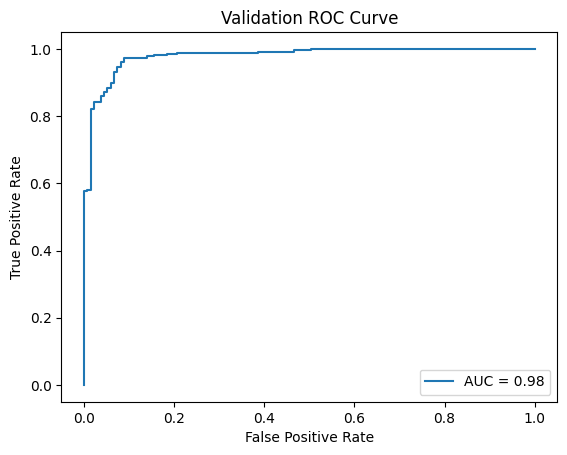

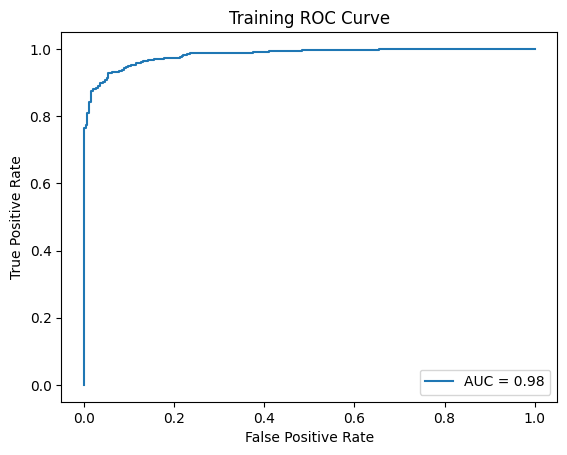

In [ ]:
from sklearn.metrics import roc_curve, RocCurveDisplay, auc

y, t = get_prediction(model, val_data)

fpr, tpr, thresholds = roc_curve(t, y)
roc_auc = auc(fpr, tpr)
rocp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
rocp.plot()
plt.title("Validation ROC Curve")


y, t = get_prediction(model, train_data)

fpr, tpr, thresholds = roc_curve(t, y)
roc_auc = auc(fpr, tpr)
rocp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
rocp.plot()
plt.title("Training ROC Curve")

Here is a function you can use to estimate the auc:

In [ ]:
def get_auc(model, data):
    y, t = get_prediction(model, data)
    fpr, tpr, thresholds = roc_curve(t, y)
    return auc(fpr, tpr)

## Part 4. Hyperparameter Tuning via Grid Search

As we mentioned in lab 1, hyperparameter choices matter significantly,
and these hyperparameter choices interact with one another.
Practitioners use a strategy called **grid search** to try
all variations of hyperparameters from a set of hyperparameters.

One very important hyperparameter is the number of hidden units in our MLPModel.
This setting affects the number of parameters (weights/biases) used in our model.

The use of ReLU vs sigmoid activation function is another hyperparameter that we
will explore.

Finally, optimization parameters like the batch size and the learning rate can
also significantly affect the learning process.

In [ ]:
class MLPModelSigmoid(nn.Module):
    """A three-layer MLP model for binary classification"""
    def __init__(self, input_dim=28*28, num_hidden=100):
        super(MLPModelSigmoid, self).__init__()
        self.fc1 = nn.Linear(input_dim, num_hidden)
        self.fc2 = nn.Linear(num_hidden, num_hidden)
        self.fc3 = nn.Linear(num_hidden, 1)
        self.sig = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.sig(out)
        out = self.fc2(out)
        out = self.sig(out)
        out = self.fc3(out)
        return out

**Graded Task**: Complete the code below, which performs grid search over the following hyperparameter
values of the:

- hidden size
- activation function (ReLu vs sigmoid activation)
- batch size
- learning rate

Do so by creating a new model and train it with the appropriate
settings, then assessing the final training/validation accuracy,
precision, recall, and AUC score. You may use to use
the flag `plot=False` when calling `train_model`. You might
also set `plot_every` to a large value and visualize the
training curve as a separate step for hyperparameter values
that you're interested in.

Please include all your output in your submission.

(There is one more graded task below that you can complete while the
hyperparameter tuning is running.)

In [ ]:
gridsearch = {}
for num_hidden in [25, 100, 250]:
    for act in ["relu", "sigmoid"]:
        for bs in [10, 100, 500]:
            for lr in [0.01, 0.1]:
                # Adjust num_epoch based on the batch size, so that we
                # train for the same number of iterations irrespective
                # of batch size
                ne = int(20 * (bs/100))

                modelname = f"num_hidden: {num_hidden}, activation: {act}, batch_size: {bs}, learning_rate: {lr}"
                print(f"========={modelname}")

                # TODO: create and train the model with the appropriate settings
                if act == 'relu':
                    m = MLPModel(num_hidden=num_hidden)
                else:
                    m = MLPModelSigmoid(num_hidden=num_hidden)
                train_model(m, train_data, val_data, learning_rate=lr, num_epochs=ne, plot_every=100, batch_size=bs)

                # Update and display metrics. This part is done for you.
                metrics = {
                    "acc_train": accuracy(m, train_data),
                    "acc_val": accuracy(m, val_data),
                    "precision_train": precision(m, train_data),
                    "precision_val": precision(m, val_data),
                    "recall_train": recall(m, train_data),
                    "recall_val": recall(m, val_data),
                    "auc_train": get_auc(m, train_data),
                    "auc_val": get_auc(m, val_data),
                }
                gridsearch[modelname] = metrics
                print(f'Accuracy (train):{metrics["acc_train"]} (val):{metrics["acc_val"]}')
                print(f'Precision (train):{metrics["precision_train"]} (val):{metrics["precision_val"]}')
                print(f'Recall (train):{metrics["recall_train"]} (val):{metrics["recall_val"]}')
                print(f'AUC (train):{metrics["auc_train"]} (val):{metrics["auc_val"]}')

Output hidden; open in https://colab.research.google.com to view.

Please include the below output in your submission

In [ ]:
print(gridsearch)

{'num_hidden: 25, activation: relu, batch_size: 10, learning_rate: 0.01': {'acc_train': 0.9252336448598131, 'acc_val': 0.9312977099236641, 'precision_train': tensor(0.9522), 'precision_val': tensor(0.9561), 'recall_train': tensor(0.9468), 'recall_val': tensor(0.9512), 'auc_train': 0.9802692711700065, 'auc_val': 0.9732457393125773}, 'num_hidden: 25, activation: relu, batch_size: 10, learning_rate: 0.1': {'acc_train': 0.9180118946474086, 'acc_val': 0.9198473282442748, 'precision_train': tensor(0.9118), 'precision_val': tensor(0.9161), 'recall_train': tensor(0.9848), 'recall_val': tensor(0.9820), 'auc_train': 0.980353466026081, 'auc_val': 0.9766352470722651}, 'num_hidden: 25, activation: relu, batch_size: 100, learning_rate: 0.01': {'acc_train': 0.9260832625318607, 'acc_val': 0.9370229007633588, 'precision_train': tensor(0.9499), 'precision_val': tensor(0.9635), 'recall_train': tensor(0.9505), 'recall_val': tensor(0.9512), 'auc_train': 0.9762697711916462, 'auc_val': 0.9740835951632867}, '

**Task**: Which hyperparameter choice is the "best"? You should base this answer on the
validation AUC. Use the other metrics as a guide to understand the kinds of predictions and mistakes
that your model is likely make.
Train a final model with those hyperparameter values.

The best model is num_hidden: 250, activation: relu, batch_size: 500, learning_rate: 0.1 with acc = 0.9858135770732173
50 Loss: 0.5238344669342041 Train Acc: 0.7421410365335599 Val Acc: 0.7423664122137404
100 Loss: 0.3725975453853607 Train Acc: 0.9067544604927783 Val Acc: 0.9122137404580153
150 Loss: 0.2749684154987335 Train Acc: 0.8908241291418861 Val Acc: 0.8893129770992366
200 Loss: 0.28301382064819336 Train Acc: 0.8806287170773152 Val Acc: 0.8702290076335878
250 Loss: 0.22667166590690613 Train Acc: 0.9245964316057774 Val Acc: 0.933206106870229
300 Loss: 0.35640302300453186 Train Acc: 0.802463891248938 Val Acc: 0.7690839694656488
350 Loss: 0.19150128960609436 Train Acc: 0.9245964316057774 Val Acc: 0.933206106870229
400 Loss: 0.20223845541477203 Train Acc: 0.9165250637213254 Val Acc: 0.9103053435114504
450 Loss: 0.15132637321949005 Train Acc: 0.9367034834324554 Val Acc: 0.9522900763358778
500 Loss: 0.16304391622543335 Train Acc: 0.9309685641461343 Val Acc: 0.9370229007633588
550 Loss

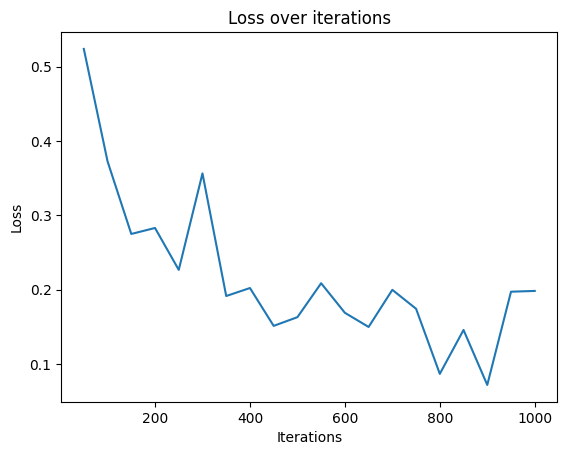

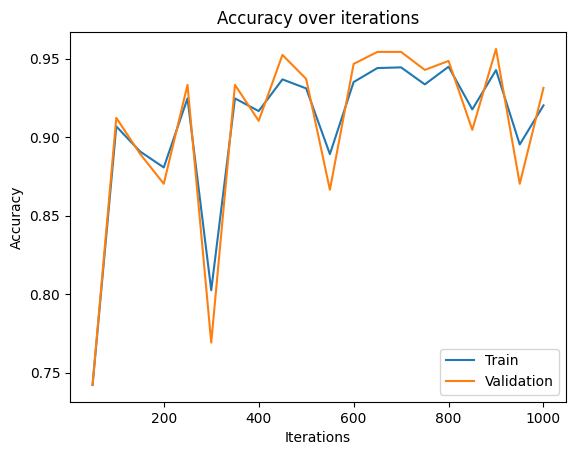

In [ ]:
# TODO
best_model = None
best_auc = -1
for k, v in gridsearch.items():
    if v['auc_val'] > best_auc:
        best_model = k
        best_auc = v['auc_val']

print(f'The best model is {best_model} with acc = {best_auc}')

model = MLPModel(num_hidden=250)
train_model(model, train_data, val_data, learning_rate=0.1, num_epochs=100, batch_size=500)

**Task**: Report the test accuracy and AUC for this model, and plot the confusion matrix over the test set.

Text(0.5, 1.0, 'Confusion Matrix (Test Data)')

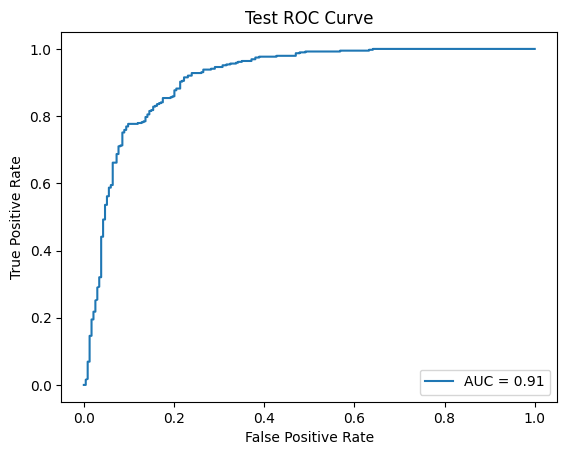

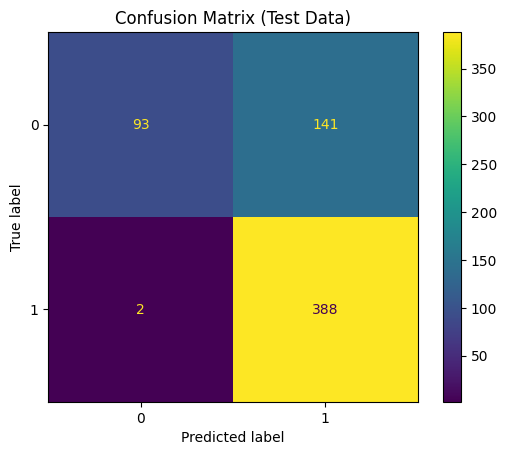

In [ ]:
# TODO
y, t = get_prediction(model, test_data)

fpr, tpr, thresholds = roc_curve(t, y)
roc_auc = auc(fpr, tpr)
rocp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
rocp.plot()
plt.title("Test ROC Curve")

y, t = get_prediction(model, test_data)
y = y > 0.5
ConfusionMatrixDisplay(confusion_matrix(t, y), display_labels=["0", "1"]).plot()
plt.title("Confusion Matrix (Test Data)")

**Graded Task**: Explain why a model with high AUC may still
produce consistently poor predictions for a subset of the population.
You might find this article interesting: [Gender imbalance in medical imaging datasets produces biased classifiers for computer-aided diagnosis](https://www.pnas.org/doi/10.1073/pnas.1919012117); in particular,
Figure 1 shows how test AUC differs male/female patients depending on the training set used.

In [ ]:
# TODO
"""
According to the paper, the performance on the minority class is significantly lower.
If the dataset we are using are skewed with a significant minority class, this implies that
the model could still depend heavily on the majority class and thus have a poor prediction.
"""

'\nAccording to the paper, the performance on the minority class is significantly lower.\nIf the dataset we are using are skewed with a significant minority class, this implies that\nthe model could still depend heavily on the majority class and thus have a poor prediction.\n'